In [1]:
import pandas as pd
%pip install ydata-profiling --quiet
from ydata_profiling import ProfileReport


df = pd.read_csv("dane_lista3.csv")

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
df['Transaction ID'] = df['Transaction ID'].astype(str)
df['Item'] = df['Item'].astype(str)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Payment Method'] = df['Payment Method'].astype(str)
df['Location'] = df['Location'].astype(str)
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

p = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
p.to_file("profiling_report.html")
p.to_notebook_iframe()


c:\Users\Jedrzej\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:365: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 47.62it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df[df['Transaction ID'].duplicated(keep=False)].sort_values('Transaction ID')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2216,TXN_1108663,Juice,3.0,3.0,9.0,Cash,Takeaway,2023-08-16
7033,TXN_1108663,Cookie,2.0,1.0,2.0,Digital Wallet,UNKNOWN,NaT
2205,TXN_8859035,Cake,3.0,3.0,9.0,Digital Wallet,Takeaway,2023-01-19
7013,TXN_8859035,Cake,3.0,3.0,9.0,Digital Wallet,Takeaway,2023-01-19
8004,TXN_8859035,Cake,3.0,3.0,9.0,Digital Wallet,Takeaway,2023-01-19


In [15]:
df['Price Per Unit'].unique()

array([2. , 3. , 1. , 5. , 4. , 1.5, nan])

In [17]:
df[df['Quantity'] > 50]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
7788,TXN_7445257,Coffee,100.0,2.0,2.0,nan,nan,2023-04-02


In [20]:
print(df['Quantity'].unique())

[  2.   4.   5.   3.   1.  nan  -2. 100.]


In [ ]:
import matplotlib.pyplot as plt

value_counts = df['Price Per Unit'].value_counts()

p = value_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Liczba wystąpień wartości w kolumnie "Price Per Unit"')
plt.xlabel('Price Per Unit')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
plt.show()
p.figure.savefig('wykres.png', bbox_inches='tight')

C:\Users\Jędrzej\AppData\Local\Temp\ipykernel_20096\1186137451.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [30]:
df['Total Spent'].unique()

array([ 4. , 12. ,  nan, 10. , 20. ,  9. , 16. , 15. , 25. ,  8. ,  5. ,
        3. ,  6. ,  2. ,  1. ,  7.5,  4.5,  1.5])

In [35]:
df[df['Quantity'] * df['Price Per Unit'] != df['Total Spent']]

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
20,TXN_3522028,Smoothie,NaN,4.0,20.0,Cash,In-store,2023-04-04
25,TXN_7958992,Smoothie,3.0,4.0,NaN,UNKNOWN,UNKNOWN,2023-12-13
31,TXN_8927252,UNKNOWN,2.0,1.0,NaN,Credit Card,ERROR,2023-11-06
42,TXN_6650263,Tea,2.0,1.5,NaN,nan,Takeaway,2023-01-10
...,...,...,...,...,...,...,...,...
9986,TXN_3142496,Smoothie,NaN,4.0,4.0,Cash,Takeaway,2023-07-27
9990,TXN_9594133,Cake,5.0,3.0,NaN,ERROR,nan,NaT
9995,TXN_4766549,Smoothie,2.0,4.0,NaN,Cash,nan,2023-10-20
9998,TXN_9659401,nan,3.0,NaN,3.0,Digital Wallet,nan,2023-06-02


In [36]:
df[df['Quantity'] * df['Price Per Unit'] == df['Total Spent']].dropna(subset=['Total Spent', 'Quantity', 'Price Per Unit'])

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,nan,2023-03-31
...,...,...,...,...,...,...,...,...
9994,TXN_2739140,Smoothie,4.0,4.0,16.0,UNKNOWN,In-store,2023-07-05
9996,TXN_7851634,UNKNOWN,4.0,4.0,16.0,nan,nan,2023-01-08
9997,TXN_7672686,Coffee,2.0,2.0,4.0,nan,UNKNOWN,2023-08-30
9999,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,nan,2023-03-02


In [37]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', 'nan',
       'Digital Walle', 'CreditCard'], dtype=object)

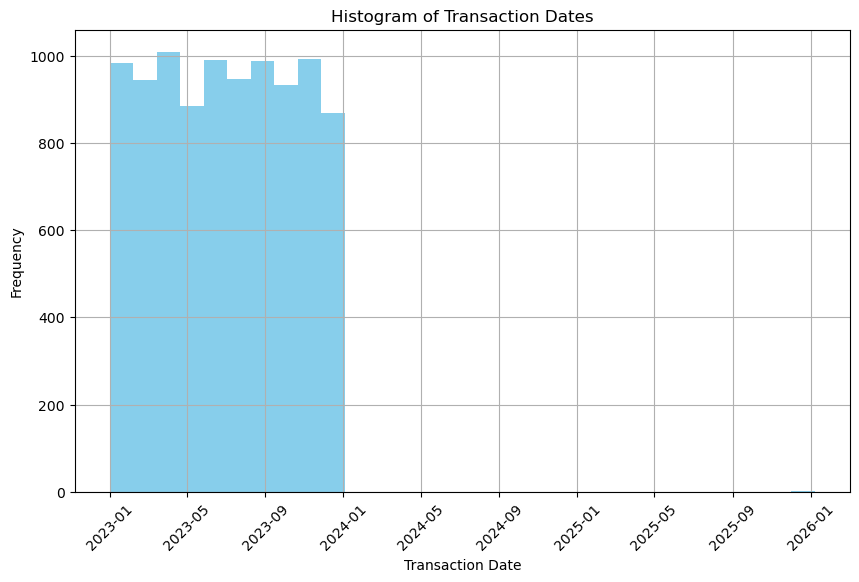

In [ ]:
import matplotlib.dates as mdates

%matplotlib inline

df['Transaction Date'].hist(bins=30, figsize=(10, 6), color='skyblue')
plt.title('Histogram of Transaction Dates')
plt.xlabel('Transaction Date')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 
plt.xticks(rotation=45)
plt.show()

In [43]:

# 1. Sprawdzenie unikalności Transaction ID
duplicated_ids = df.duplicated(subset=["Transaction ID"]).sum()
if duplicated_ids == 0:
    print("Transaction ID jest unikalnym kluczem (brak duplikatów).")
else:
    print(f"Znaleziono {duplicated_ids} duplikatów w Transaction ID.")

# 2. Sprawdzenie zależności funkcyjnej: Item -> Price Per Unit
# Grupujemy dane po 'Item', uwzględniając wartości NaN (dropna=False) i liczymy liczbę unikalnych cen.
item_price_consistency = df.groupby("Item", dropna=False)["Price Per Unit"].nunique(dropna=True)
inconsistent_items = item_price_consistency[item_price_consistency > 1]

if inconsistent_items.empty:
    print("Dla każdego produktu cena jednostkowa jest stała (Item -> Price Per Unit spełnione).")
else:
    print("Niespójności w zależności Item -> Price Per Unit (występuje więcej niż jedna cena dla danego produktu):")
    print(inconsistent_items)

# 3. Sprawdzenie zależności funkcyjnej: (Quantity, Price Per Unit) -> Total Spent
# Grupujemy dane według par (Quantity, Price Per Unit) z uwzględnieniem NaN
qp_total_consistency = df.groupby(["Quantity", "Price Per Unit"], dropna=False)["Total Spent"].nunique(dropna=True)
inconsistent_qp = qp_total_consistency[qp_total_consistency > 1]

if inconsistent_qp.empty:
    print("Dla każdej pary (Quantity, Price Per Unit) wartość Total Spent jest jednoznaczna.")
else:
    print("Niespójności w zależności (Quantity, Price Per Unit) -> Total Spent (dla jednej pary występuje więcej niż jedna wartość Total Spent):")
    print(inconsistent_qp)


Znaleziono 3 duplikatów w Transaction ID.
Niespójności w zależności Item -> Price Per Unit (występuje więcej niż jedna cena dla danego produktu):
Item
ERROR      6
UNKNOWN    6
nan        6
Name: Price Per Unit, dtype: int64
Niespójności w zależności (Quantity, Price Per Unit) -> Total Spent (dla jednej pary występuje więcej niż jedna wartość Total Spent):
Quantity  Price Per Unit
1.0       NaN                6
2.0       NaN                6
3.0       NaN                6
4.0       NaN                6
5.0       NaN                6
NaN       1.0                5
          1.5                5
          2.0                5
          3.0                5
          4.0                5
          5.0                5
          NaN               13
Name: Total Spent, dtype: int64


In [ ]:

df_filtered = df[(df['Quantity'] >= 1) & (df['Quantity'] <= 5)]

item_quantity_counts = df_filtered.groupby(['Item', 'Quantity']).size().unstack(fill_value=0)

print("Liczba zakupów poszczególnych produktów przy ilościach od 1 do 5:")
print(item_quantity_counts)


Liczba zakupów poszczególnych produktów przy ilościach od 1 do 5:
Quantity  1.0  2.0  3.0  4.0  5.0
Item                             
Cake      209  232  200  208  246
Coffe       0    0    1    0    0
Coffee    217  212  215  209  248
Cookie    209  231  179  218  202
ERROR      48   58   54   51   63
Juice     215  231  235  224  219
Salad     219  227  195  218  236
Sandwich  213  205  222  194  236
Smoothie  193  211  211  212  225
Tea       181  228  205  198  222
UNKNOWN    64   72   65   66   54
nan        53   66   69   65   62


In [48]:
cols_to_check = ['Quantity', 'Total Spent', 'Price Per Unit']

df['null_count'] = df[cols_to_check].isnull().sum(axis=1)

count_exactly_one_null = (df['null_count'] == 1).sum()

print("Liczba rekordów, gdzie dokładnie jeden z atrybutów jest null:", count_exactly_one_null)

Liczba rekordów, gdzie dokładnie jeden z atrybutów jest null: 1398


In [ ]:
cols_to_check = ['Quantity', 'Total Spent', 'Price Per Unit']
null_counts = df[cols_to_check].isnull().sum(axis=1)
rows_with_exactly_one_null = (null_counts == 1)
num_rows_with_one_null = rows_with_exactly_one_null.sum()
total_rows = len(df)
percentage = (num_rows_with_one_null / total_rows) * 100
print(f"Procent rekordów, w których dokładnie jeden z atrybutów {cols_to_check} jest null: {percentage:.2f}%")

Procent rekordów, w których dokładnie jeden z atrybutów ['Quantity', 'Total Spent', 'Price Per Unit'] jest null: 13.98%


In [ ]:
item_price_mapping = df.dropna(subset=['Price Per Unit', 'Item']).groupby('Item')['Price Per Unit'].unique()
consistent_price_items = {item: prices[0] for item, prices in item_price_mapping.items() if len(prices) == 1}
missing_price_records = df[df['Price Per Unit'].isnull() & df['Item'].notna()]
recoverable_records = missing_price_records[missing_price_records['Item'].isin(consistent_price_items.keys())]

print(f"Liczba produktów z unikalną, stałą ceną: {len(consistent_price_items)}")
print(f"Liczba rekordów z brakującą ceną jednostkową, które można uzupełnić: {len(recoverable_records)}")
print(f"Procent wszystkich rekordów z brakującą ceną, które można uzupełnić: {len(recoverable_records)/len(missing_price_records)*100:.2f}% (jeśli są takie rekordy)")
print(f"Procent wszystkich rekordów: {len(recoverable_records)/len(df)*100:.2f}%")

Liczba produktów z unikalną, stałą ceną: 9
Liczba rekordów z brakującą ceną jednostkową, które można uzupełnić: 479
Procent wszystkich rekordów z brakującą ceną, które można uzupełnić: 89.87% (jeśli są takie rekordy)
Procent wszystkich rekordów: 4.79%


In [ ]:
df_clean = df.copy()
df_clean.loc[df_clean['Item'].isin(['UNKNOWN', 'ERROR', 'nan']), 'Item'] = None

price_item_mapping = df_clean.dropna(subset=['Price Per Unit', 'Item']).groupby('Price Per Unit')['Item'].unique()

display(price_item_mapping)

unique_price_to_item = {price: items[0] for price, items in price_item_mapping.items() 
                        if len(items) == 1 and not any(item in ['nan', 'UNKNOWN', 'ERROR', None] for item in items)}

missing_item_records = df_clean[
    (df_clean['Item'].isnull() | df_clean['Item'].isin(['UNKNOWN', 'ERROR'])) & 
    df_clean['Price Per Unit'].notna()
]

recoverable_records = missing_item_records[missing_item_records['Price Per Unit'].isin(unique_price_to_item.keys())]

print(f"Liczba rekordów z brakującą/niepoprawną nazwą produktu, które można uzupełnić: {len(recoverable_records)}")
print(f"Procent wszystkich rekordów: {len(recoverable_records)/len(df)*100:.2f}%")

Price Per Unit
1.0                [Cookie]
1.5                   [Tea]
2.0         [Coffee, Coffe]
3.0           [Cake, Juice]
4.0    [Smoothie, Sandwich]
5.0                 [Salad]
Name: Item, dtype: object

Liczba rekordów z brakującą/niepoprawną nazwą produktu, które można uzupełnić: 349
Procent wszystkich rekordów: 3.49%
